In [1]:
pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 7.3 MB/s            
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.14.0
    Uninstalling tensorflow-addons-0.14.0:
      Successfully uninstalled tensorflow-addons-0.14.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os

#required libraries
import cv2

In [2]:
data_train = []
type_of_disease =['Bengin cases', 'Malignant cases','Normal cases']
data_directory = '/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/'
train_directory = os.path.join(data_directory)

for id, sp in enumerate(type_of_disease):
#     print('************')
#     print(id)
#     print(sp)
    for file in os.listdir(os.path.join(train_directory, sp)):
#         print('************')
#         print(file)
        data_train.append(['{}/{}/{}'.format(data_directory,sp, file), id, sp])
    
    

        
train = pd.DataFrame(data_train, columns=['Image', 'Id of Disease','Type of Disease'])

In [3]:
train.head()

,Image,Id of Disease,Type of Disease
0,/kaggle/input/iqothnccd-lung-cancer-dataset/Th...,0,Bengin cases
1,/kaggle/input/iqothnccd-lung-cancer-dataset/Th...,0,Bengin cases
2,/kaggle/input/iqothnccd-lung-cancer-dataset/Th...,0,Bengin cases
3,/kaggle/input/iqothnccd-lung-cancer-dataset/Th...,0,Bengin cases
4,/kaggle/input/iqothnccd-lung-cancer-dataset/Th...,0,Bengin cases


In [4]:
#make the order of training set randomize
SEED = 42
train = train.sample(frac=1, random_state=SEED)
train.index = np.arange(len(train))

In [5]:
train.head()

,Image,Id of Disease,Type of Disease
0,/kaggle/input/iqothnccd-lung-cancer-dataset/Th...,0,Bengin cases
1,/kaggle/input/iqothnccd-lung-cancer-dataset/Th...,1,Malignant cases
2,/kaggle/input/iqothnccd-lung-cancer-dataset/Th...,0,Bengin cases
3,/kaggle/input/iqothnccd-lung-cancer-dataset/Th...,1,Malignant cases
4,/kaggle/input/iqothnccd-lung-cancer-dataset/Th...,1,Malignant cases


In [6]:
SIZE_OF_IMAGE = 256
def read_image(imagepath):
    return cv2.imread(imagepath)

def resize_image(image, image_Size):
    return cv2.resize(image.copy(), image_Size, interpolation=cv2.INTER_AREA)

In [7]:
from tqdm import tqdm
x_train = np.zeros((train.shape[0], SIZE_OF_IMAGE, SIZE_OF_IMAGE, 3))

for i, file in tqdm(enumerate(train['Image'].values)):
    image = read_image(file)
    
    if image is not None:
        x_train[i] = resize_image(image,(SIZE_OF_IMAGE, SIZE_OF_IMAGE))
        
X_Train = x_train / 255
print('Train shape: {}'.format(X_Train.shape))

1097it [00:14, 76.79it/s]


Train shape: (1097, 256, 256, 3)


In [8]:
del data_train
del x_train

In [9]:
from keras.utils.np_utils import to_categorical
y_train = train['Id of Disease'].values
y_train2 = to_categorical(y_train, num_classes=3)

In [10]:
y_train=np.zeros((y_train2.shape[0]))
for i in range(y_train2.shape[0]):
    if(y_train2[i][1]==1) :
        y_train[i]=1
    else :
        if (y_train2[i][2]==1) :
            y_train[i]=2

In [11]:
#train and test splitting
from sklearn.model_selection import train_test_split
BATCH_SIZE = 4

x_train, x_test, y_train, y_test = train_test_split(X_Train,y_train, test_size=0.2, random_state=SEED,stratify = y_train)

In [12]:

num_classes = 3
input_shape = (256, 256, 3)

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (877, 256, 256, 3) - y_train shape: (877,)
x_test shape: (220, 256, 256, 3) - y_test shape: (220,)


In [13]:
print(x_train[8])

[[[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 ...

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]


In [14]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 4
num_epochs = 100
image_size = 256  # We'll resize input images to this size
patch_size = 16  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 6
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [15]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [16]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [17]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches
    def get_config(self):
        base_config = super().get_config()
        config = {
            "sublayer": keras.saving.serialize_keras_object(self.sublayer),
        }
        return {**base_config, **config}

    @classmethod
    def from_config(cls, config):
        sublayer_config = config.pop("sublayer")
        sublayer = keras.saving.deserialize_keras_object(sublayer_config)
        return cls(sublayer, **config)

Image size: 256 X 256
Patch size: 16 X 16
Patches per image: 256
Elements per patch: 768


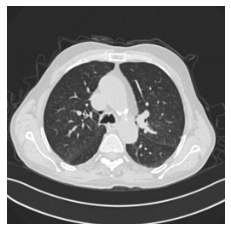

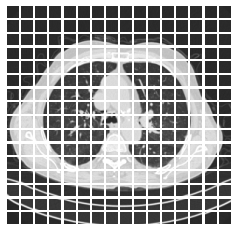

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[5]
plt.imshow(image)
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy())
    plt.axis("off")

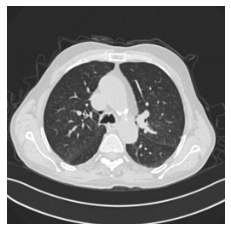

In [19]:
image = x_train[5]

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [20]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim, **kwargs):
        super(PatchEncoder, self).__init__(**kwargs)
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

    def get_config(self):
        base_config = super().get_config()
        config = {
            "sublayer": keras.saving.serialize_keras_object(self.sublayer),
        }
        return {**base_config, **config}

    @classmethod
    def from_config(cls, config):
        sublayer_config = config.pop("sublayer")
        sublayer = keras.saving.deserialize_keras_object(sublayer_config)
        return cls(sublayer, **config)


In [21]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [22]:
def resize1(x):
    x=tf.reshape(x,[-1,16,16,64])
    return x
def resize2(x):
    x=tf.reshape(x,[-1,256,64])
    return x

In [23]:
def shift1(x):
#     x = tf.roll(x, shift=(-2, -2), axis=(2, 3))
    return tf.roll(x, shift=(-2, -2), axis=(1, 2))
  
    
def shift2(x):
    x = tf.roll(x, shift=(2, 2), axis=(1, 2))
    return x   

In [24]:
def fold(x, kernel_size, stride,rate):
    x=tf.reshape(x,[-1,16,16,64])

    x = tf.image.extract_patches(
        images=x,
        sizes=[1, kernel_size, kernel_size, 1],
        strides=[1, stride, stride, 1],
        rates=[1, rate, rate, 1],
        padding='SAME'
    )
    
    x=tf.reshape(x,[-1,256,64])
    return x
    

In [25]:
def fun(e_p) :
       # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(e_p)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, e_p])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        e_p = layers.Add()([x3, x2])
        return e_p
    

def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
        
    l1=fun(encoded_patches)
    encoded_patches=l1
    encoded_patches=resize1(encoded_patches)
    encoded_patches=shift1(encoded_patches)
    encoded_patches=resize2(encoded_patches)
    #encoded_patches=fold(encoded_patches,2,2,2)
    
    l2=fun(encoded_patches)
    encoded_patches=l2
    encoded_patches=resize1(encoded_patches)
    encoded_patches=shift1(encoded_patches)
    encoded_patches=resize2(encoded_patches)
   # encoded_patches=fold(encoded_patches,2,2,2)
    
    l3=fun(encoded_patches)
    encoded_patches=l3
   # encoded_patches=fold(encoded_patches,2,2,2)
    encoded_patches=shift2(encoded_patches)
    encoded_patches=resize2(encoded_patches)
    
    l4=encoded_patches +l2
    encoded_patches=l4
    
    l5=fun(encoded_patches)
    encoded_patches=l5
   # encoded_patches=fold(encoded_patches,2,2,2)
    encoded_patches=shift2(encoded_patches)
    encoded_patches=resize2(encoded_patches)
    
    
    l6=l1+encoded_patches
    encoded_patches=l6
    l7=fun(encoded_patches)
    encoded_patches=l7
    spk=l7.shape
    

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [28]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(2, name="top-2-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=100,
        validation_split=0.25,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()


In [29]:
vit_classifier.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
data_augmentation (Sequential)  (None, 256, 256, 3)  7           input_2[0][0]                    
__________________________________________________________________________________________________
patches_2 (Patches)             (None, None, 768)    0           data_augmentation[1][0]          
__________________________________________________________________________________________________
patch_encoder_1 (PatchEncoder)  (None, 256, 64)      65600       patches_2[0][0]                  
____________________________________________________________________________________________

In [31]:
model = run_experiment(vit_classifier)

Epoch 1/100
165/165 [==============================] - 12s 34ms/step - loss: 0.2237 - accuracy: 0.9300 - top-2-accuracy: 0.9909 - val_loss: 0.1677 - val_accuracy: 0.9273 - val_top-2-accuracy: 0.9682
Epoch 2/100
165/165 [==============================] - 5s 30ms/step - loss: 0.2272 - accuracy: 0.9361 - top-2-accuracy: 0.9878 - val_loss: 0.2242 - val_accuracy: 0.9318 - val_top-2-accuracy: 0.9955
Epoch 3/100
165/165 [==============================] - 5s 30ms/step - loss: 0.2489 - accuracy: 0.9148 - top-2-accuracy: 0.9802 - val_loss: 0.1339 - val_accuracy: 0.9455 - val_top-2-accuracy: 1.0000
Epoch 4/100
165/165 [==============================] - 5s 31ms/step - loss: 0.1852 - accuracy: 0.9361 - top-2-accuracy: 0.9909 - val_loss: 0.1441 - val_accuracy: 0.9455 - val_top-2-accuracy: 0.9955
Epoch 5/100
165/165 [==============================] - 5s 30ms/step - loss: 0.2304 - accuracy: 0.9209 - top-2-accuracy: 0.9954 - val_loss: 0.1494 - val_accuracy: 0.9500 - val_top-2-accuracy: 0.9909
Epoch 6/1

In [33]:
vit_classifier.load_weights("/tmp/checkpoint")
_ ,accuracy, top_2_accuracy = vit_classifier.evaluate(x_test, y_test)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")
print(f"Test top 2 accuracy: {round(top_2_accuracy * 100, 2)}%")

7/7 [==============================] - 0s 32ms/step - loss: 0.1053 - accuracy: 0.9636 - top-2-accuracy: 0.9909
Test accuracy: 96.36%
Test top 2 accuracy: 99.09%


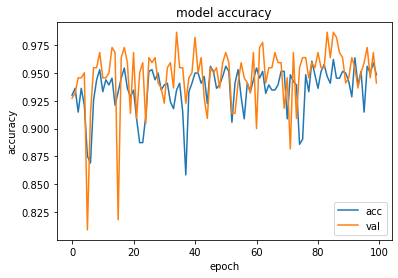

In [34]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel ('epoch')
plt.legend(['acc','val'], loc='lower right')
plt.show()

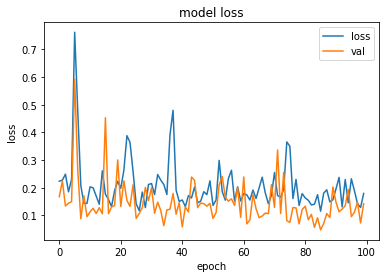

In [35]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel ('epoch')
plt.legend(['loss','val'], loc='upper right')
plt.show()

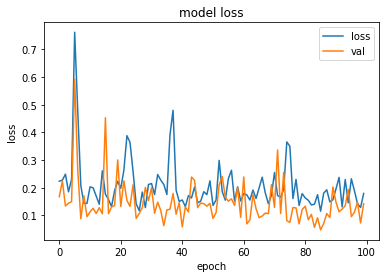

In [36]:

plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel ('epoch')
plt.legend(['loss','val'], loc='upper right')
plt.show()

In [37]:
checkpoint_filepath = "/tmp/checkpoint"
vit_classifier.load_weights(checkpoint_filepath)
y=vit_classifier.predict(x_test)
y = tf.argmax(y, axis=-1)

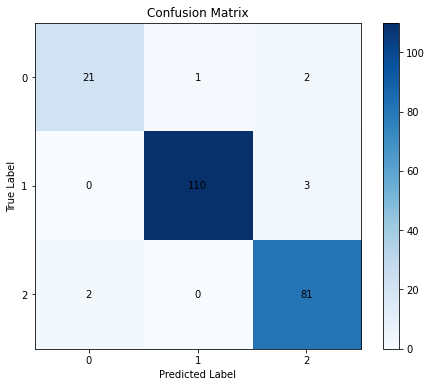

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
predicted_labels = y.numpy()
original_labels = y_test

# Calculate the confusion matrix
conf_matrix = tf.math.confusion_matrix(original_labels, predicted_labels, num_classes=3)

# Convert the confusion matrix tensor to a numpy array
conf_matrix_np = conf_matrix.numpy()

# Plot the confusion matrix with counts
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_np, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(3))
plt.yticks(np.arange(3))

# Add count values to the plot
for i in range(conf_matrix_np.shape[0]):
    for j in range(conf_matrix_np.shape[1]):
        plt.text(j, i, conf_matrix_np[i, j], ha='center', va='center', color='black')

plt.show()